## Speckle generation example

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from mmfsim.grid import Grid
from mmfsim.fiber import GrinFiber, StepIndexFiber
from mmfsim.speckle import DegenGrinSpeckle, DegenStepIndexSpeckle

In [2]:
from waveoptics.plots.plots import complex_to_hsv

def simple_complex_imshow(complex_array: np.ndarray,
                   rmin: float = None,
                   rmax: float = None,
                   hue_start: int = 0,
                   extent: tuple = None,
                   ):
    ax = plt.gca()
    plt.imshow(complex_to_hsv(complex_array, rmin, rmax, hue_start), extent=extent)
    return ax

In [3]:
fiber_type = 'step' # 'grin' or 'step'
grid_settings: dict = {'pixel_size': 0.25e-6, 'pixel_numbers': (256, 256)}
fiber_settings: dict = {'radius': 25e-6, 'wavelength': 1064e-9, 'n1': 1.465, 'n2': 1.45}

grid = Grid(**grid_settings)
if fiber_type.lower() in ['grin']:
    fiber = GrinFiber(**fiber_settings)
elif fiber_type.lower() in ['step', 'si']:
    fiber = StepIndexFiber(**fiber_settings)
else:
    raise ValueError(f"Unknown fiber type.")
print(fiber)

fiber.compute_modes_fields(grid)

c:\users\saucourt\coding\mmf_lp_modes\mmfsim\fiber.py:261: RuntimeWarning: invalid value encountered in sqrt
  w = np.sqrt(v**2 - u**2)
c:\users\saucourt\coding\mmf_lp_modes\mmfsim\fiber.py:262: RuntimeWarning: invalid value encountered in divide
  return sp.jv(n, u) / (u * sp.jv(n - 1, u)) + sp.kn(n, w) / (w * sp.kn(n - 1, w))


StepIndexFiber instance with:
  - Radius: 25.0 um
  - Core index: 1.465
  - Cladding index: 1.45
  - Wavelength: 1064.0 nm
  - Numerical aperture: 0.209
  - Number of guided LP modes: 127
  - Number of guided LP modes (counting degenerates): 244
  - First 10 LP_n,m modes characteristics:
  n_eff      h          n          m
[[ 1.46491504  0.          0.          1.        ]
 [ 1.46478431  2.          1.          1.        ]
 [ 1.46461254  4.          2.          1.        ]
 [ 1.46455239  1.          0.          2.        ]
 [ 1.46440201  6.          3.          1.        ]
 [ 1.46427707  3.          1.          2.        ]
 [ 1.46415411  8.          4.          1.        ]
 [ 1.46395943  5.          2.          2.        ]
 [ 1.46390022  2.          0.          3.        ]
 [ 1.46386979 10.          5.          1.        ]]


In [21]:
spatial_extent = np.array([np.min(grid.x), np.max(grid.x), np.min(grid.y), np.max(grid.y)]) * 1e6


if fiber_type.lower() in ['grin']:
    speckle = DegenGrinSpeckle(fiber, grid, N_modes=fiber._N_modes_degen)
elif fiber_type.lower() in ['step', 'si']:
    speckle = DegenStepIndexSpeckle(fiber, grid, N_modes=fiber._N_modes_degen)
else:
    raise ValueError(f"Unknown fiber type.")
speckle.compose()

field = speckle.field
field /= np.max(np.abs(field))

Text(0.5, 1.0, 'Field phase (noisys)')

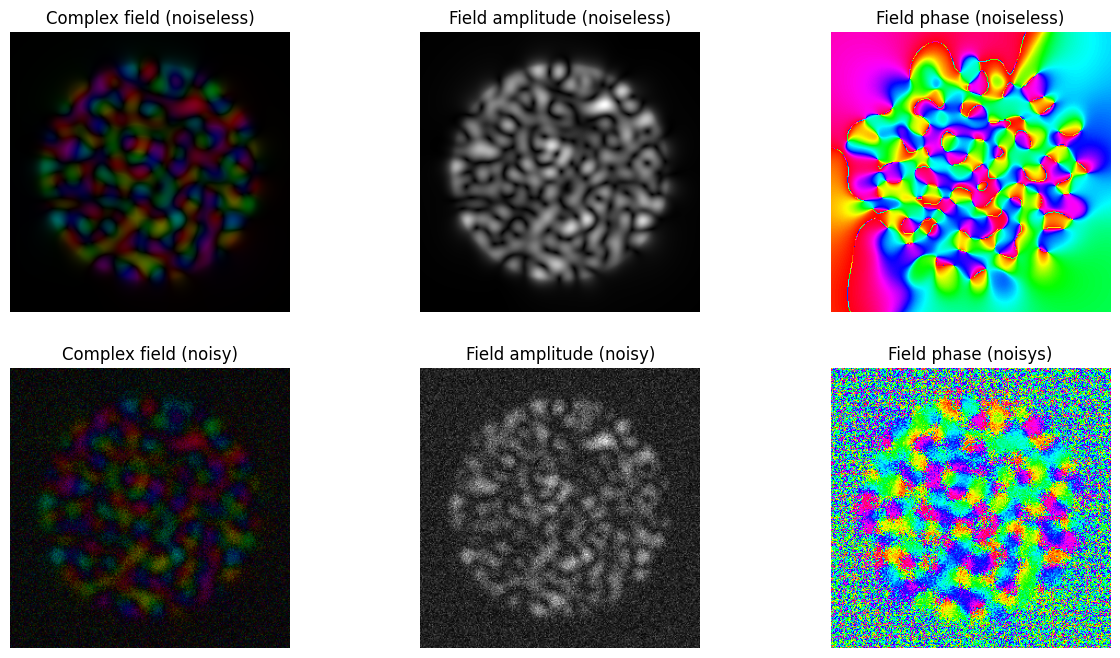

In [41]:
noisy_field = field + 0.2 / np.sqrt(2) * ((2 * np.random.rand(*field.shape) - 1) + 1j * (2 * np.random.rand(*field.shape) - 1))

noisy_field = field + 0.2 / np.sqrt(2) * ((np.random.randn(*field.shape)) + 1j * (np.random.randn(*field.shape)))


plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(complex_to_hsv(field))
plt.axis('off')
plt.title("Complex field (noiseless)")

plt.subplot(2, 3, 2)
plt.imshow(np.abs(field), cmap='gray')
plt.axis('off')
plt.title("Field amplitude (noiseless)")

plt.subplot(2, 3, 3)
plt.imshow(np.angle(field), cmap='hsv')
plt.axis('off')
plt.title("Field phase (noiseless)")

plt.subplot(2, 3, 4)
plt.imshow(complex_to_hsv(noisy_field))
plt.axis('off')
plt.title("Complex field (noisy)")

plt.subplot(2, 3, 5)
plt.imshow(np.abs(noisy_field), cmap='gray')
plt.axis('off')
plt.title("Field amplitude (noisy)")

plt.subplot(2, 3, 6)
plt.imshow(np.angle(noisy_field), cmap='hsv')
plt.axis('off')
plt.title("Field phase (noisys)")



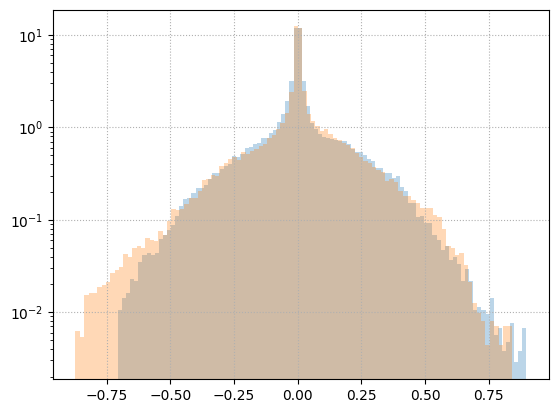

In [19]:
plt.hist(np.real(field).flatten(), alpha=0.3, density=True, bins=100);
plt.hist(np.imag(field).flatten(), alpha=0.3, density=True, bins=100);
plt.yscale('log')
plt.grid(ls=':')